In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [9]:
!gdown --id 1aUwAEMjJiScaQFGpNJBZq7SEI4Jr-PHc -O V1.csv

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aUwAEMjJiScaQFGpNJBZq7SEI4Jr-PHc
To: /content/V1.csv
100% 66.0k/66.0k [00:00<00:00, 63.8MB/s]


In [12]:
df = pd.read_csv('V1.csv', sep = ',')

In [13]:
df

,date,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2/23/2015,finishing,12,0.8,5.13,NaN,1080,0,0.0,0,0,9.0,0.902500
1,3/7/2015,sweing,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0,0.800579
2,2/16/2015,sweing,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0,0.329965
3,1/11/2015,finishing,6,0.8,2.90,NaN,1440,0,0.0,0,0,8.0,0.597348
4,2/17/2015,finishing,3,0.5,5.13,NaN,1800,0,0.0,0,0,15.0,0.786600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2/11/2015,finishing,5,0.7,4.15,NaN,240,0,0.0,0,0,2.0,0.870000
996,1/27/2015,finishing,10,0.8,3.94,NaN,1440,0,0.0,0,0,12.0,0.979528
997,2/9/2015,sweing,3,0.8,22.52,1271.0,5400,50,0.0,0,0,57.0,0.800161
998,2/17/2015,finishing,12,0.8,5.13,NaN,1080,0,0.0,0,0,9.0,0.902500


In [17]:
df.shape

(1000, 13)

In [18]:
df.isna().sum()

date                       0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      414
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [19]:
df['department'].unique()

array(['finishing', 'sweing', 'finishing '], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1000 non-null   object 
 1   department             1000 non-null   object 
 2   team                   1000 non-null   int64  
 3   targeted_productivity  1000 non-null   float64
 4   smv                    1000 non-null   float64
 5   wip                    586 non-null    float64
 6   over_time              1000 non-null   int64  
 7   incentive              1000 non-null   int64  
 8   idle_time              1000 non-null   float64
 9   idle_men               1000 non-null   int64  
 10  no_of_style_change     1000 non-null   int64  
 11  no_of_workers          1000 non-null   float64
 12  actual_productivity    1000 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 101.7+ KB


In [23]:
df['wip'].replace(np.NaN, np.float64(0), inplace = True)

In [24]:
df.isna().sum()

date                     0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [27]:
df[df['incentive']> 1000]

,date,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
45,3/9/2015,finishing,3,0.80,4.60,0.0,0,1440,0.0,0,0,12.0,0.795417
207,3/9/2015,finishing,2,0.70,3.90,0.0,0,1200,0.0,0,0,10.0,0.682500
239,3/9/2015,finishing,9,0.75,2.90,0.0,0,3600,0.0,0,0,15.0,0.841000
518,3/9/2015,finishing,5,0.60,3.94,0.0,0,2880,0.0,0,0,12.0,0.864343
831,3/9/2015,finishing,12,0.80,4.60,0.0,0,1080,0.0,0,0,9.0,0.902963


In [29]:
(df['incentive']> 1000).value_counts()

False    995
True       5
Name: incentive, dtype: int64

In [30]:
y = df['actual_productivity']
X = df.iloc[:, :-1]

In [33]:
X.head(2)

,date,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,2/23/2015,finishing,12,0.8,5.13,0.0,1080,0,0.0,0,0,9.0
1,3/7/2015,sweing,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0


In [34]:
y.head(2)

0    0.902500
1    0.800579
Name: actual_productivity, dtype: float64

In [35]:
y.mean()

0.732390698357

<ipython-input-37-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

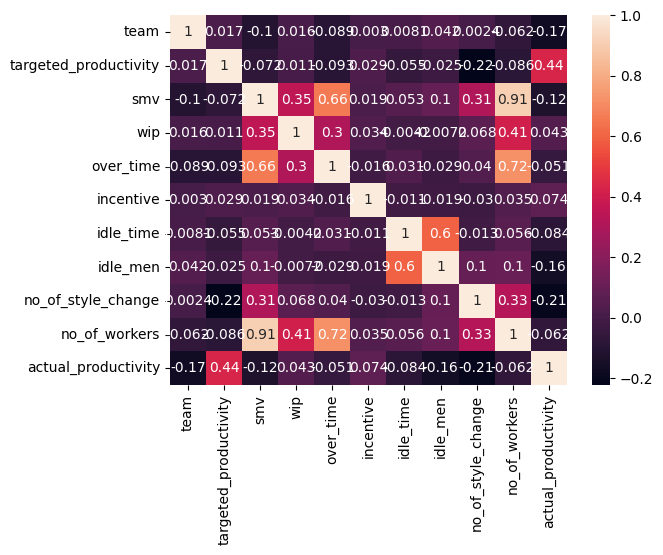

In [37]:
sns.heatmap(df.corr(), annot = True)

In [38]:
X.drop(['date'], axis = 1, inplace = True)

In [39]:
X.head(5)

,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,finishing,12,0.8,5.13,0.0,1080,0,0.0,0,0,9.0
1,sweing,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0
2,sweing,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0
3,finishing,6,0.8,2.90,0.0,1440,0,0.0,0,0,8.0
4,finishing,3,0.5,5.13,0.0,1800,0,0.0,0,0,15.0


In [40]:
X['department'].replace('sweing','Sewing', inplace = True)

In [41]:
X.head(5)

,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,finishing,12,0.8,5.13,0.0,1080,0,0.0,0,0,9.0
1,Sewing,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0
2,Sewing,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0
3,finishing,6,0.8,2.90,0.0,1440,0,0.0,0,0,8.0
4,finishing,3,0.5,5.13,0.0,1800,0,0.0,0,0,15.0


In [42]:
X['department'].replace('finishing ','finishing', inplace = True)

In [43]:
X['department'].unique()

array(['finishing', 'Sewing'], dtype=object)

In [45]:
cat_features = ['department']

In [46]:
X_encoded = pd.get_dummies(X, columns=cat_features)

In [48]:
X_encoded.head()


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_Sewing,department_finishing
0,12,0.8,5.13,0.0,1080,0,0.0,0,0,9.0,0,1
1,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0,1,0
2,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0,1,0
3,6,0.8,2.90,0.0,1440,0,0.0,0,0,8.0,0,1
4,3,0.5,5.13,0.0,1800,0,0.0,0,0,15.0,0,1


In [49]:
X_encoded['department_finishing'].value_counts()

0    586
1    414
Name: department_finishing, dtype: int64

In [50]:
X_encoded.shape

(1000, 12)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.30, random_state = 32)

In [52]:
X_train.shape

(700, 12)

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X_test)

r2_score(y_test, y_pred)

0.2743596171803069

In [68]:
cv = 9

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = lin_reg,
                           X= X_train,
                           y= y_train,
                           cv = cv,
                           scoring='r2',
                           )
np.argmax(scores)
scores[2]

0.4214966130153559

In [69]:
scores

array([ 0.21320845,  0.22218866,  0.42149661,  0.20995724, -5.02597376,
        0.33465607,  0.16345872,  0.13166296,  0.33986641])

In [62]:
import sklearn
from sklearn import metrics
sklearn.metrics.get_scorer_names() 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [73]:
from sklearn.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(lin_reg, 
                                     direction= 'forward',
                                     scoring='r2',
                                     n_features_to_select = 5)
selector.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          scoring='r2')

In [76]:
selector.get_support()

array([ True,  True, False, False, False,  True, False,  True,  True,
       False, False, False])

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
selector = SelectKBest(score_func= mutual_info_regression,
                       k = 5,
                       )
X_new = selector.fit_transform(X_train, y_train)

In [85]:
selector.get_feature_names_out()

array(['targeted_productivity', 'smv', 'over_time', 'incentive',
       'no_of_workers'], dtype=object)

In [88]:
X_tr = pd.DataFrame(X_new, columns = selector.get_feature_names_out())

In [89]:
X_tr

,targeted_productivity,smv,over_time,incentive,no_of_workers
0,0.75,3.94,240.0,0.0,2.0
1,0.65,24.26,6600.0,0.0,55.0
2,0.70,5.13,960.0,0.0,8.0
3,0.70,21.82,5040.0,30.0,51.0
4,0.50,26.66,6840.0,30.0,57.0
...,...,...,...,...,...
695,0.80,30.10,3360.0,50.0,57.0
696,0.70,30.33,6840.0,0.0,57.0
697,0.60,14.89,10080.0,38.0,56.0
698,0.70,22.94,10500.0,60.0,57.0


In [90]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
r2_score(y_train, y_pred)

0.29389210400668586

In [91]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha = 0.1)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

r2_score(y_train, y_pred)



0.025733975032670386

In [92]:
reg.intercept_

0.7448365508380554

In [93]:
reg.coef_

array([-1.05719575e-03,  0.00000000e+00, -8.82853988e-04,  9.55743139e-06,
       -5.94181360e-07,  6.80211027e-05, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [94]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(random_state = 32)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


1.4773095857140542e+31

In [96]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 8, test_size = 0.4, random_state = 32)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, 
                          X_train,
                          y_train,
                          cv = cv)

scores.mean()

-5.159534287786373e+34

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Define the pipeline with PolynomialFeatures and Lasso
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lasso', Lasso())
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'poly__degree': [1, 2, 3],
    'lasso__alpha': np.logspace(-3, 0, num=8),
}

grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', cv=5)

grid.fit(X_train, y_train)

best_alpha = grid.best_params_['lasso__alpha']
best_alpha


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.580e+00, tolerance: 1.789e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.550e+00, tolerance: 1.732e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.943e+00, tolerance: 1.835e-03

1.0

In [101]:
grid.best_params_

{'lasso__alpha': 1.0, 'poly__degree': 2}

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5,
          svd_solver='full',
          whiten = True,
          random_state = 32)

pca.fit(X_train)

PCA(n_components=5, random_state=32, svd_solver='full', whiten=True)

In [110]:
x_train_reduced = pca.transform(X_train)

In [109]:
pca.explained_variance_ratio_.sum()

0.9999977408577673

In [111]:
from sklearn.linear_model import RidgeCV
# Define the RidgeCV estimator with the specified alpha values
ridge_cv = RidgeCV(alphas=[0.1, 0.01, 1, 0.005])

# Fit the RidgeCV estimator to the transformed training data and y_train
ridge_cv.fit(x_train_reduced, y_train)

# Print the best_score_ value
print("Best score:", ridge_cv.best_score_)

Best score: -0.05199837263469472
